# Example Out-of-Framework file
This file demonstrates how one can access the modules at different levels of abstraction (highest: access via MnistExperiment, lowest: MnistDataset)
## Analysis of MNIST

### Access via MnistExperiment

In [3]:
import os
from src.datasets.mnist_dataset import MnistDataset, MnistDatasetArgs
from src.args.yaml_config import YamlConfig
yaml_config = YamlConfig()
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from src.experiments.mnist_experiment import MnistExperiment, MnistExperimentArgs






In [ ]:
ex = MnistExperiment(MnistExperimentArgs(hidden_sizes=[64], experiment_id="mnist", use_cuda=False).model_dump(), yaml_config.config)

train = ex._create_dataset("train")
val = ex._create_dataset("val")
test = ex._create_dataset("test")

sample = train[0]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

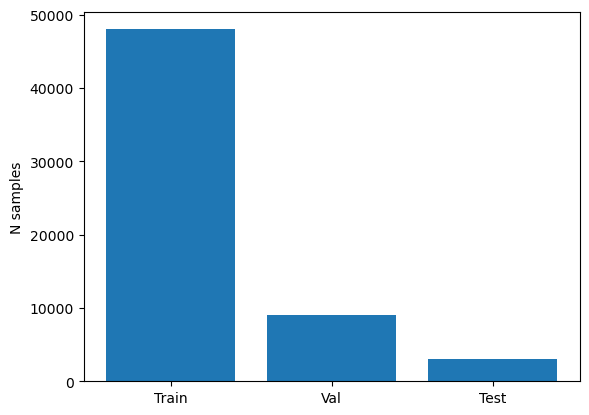

In [5]:
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")

### Access via MnistDataset module

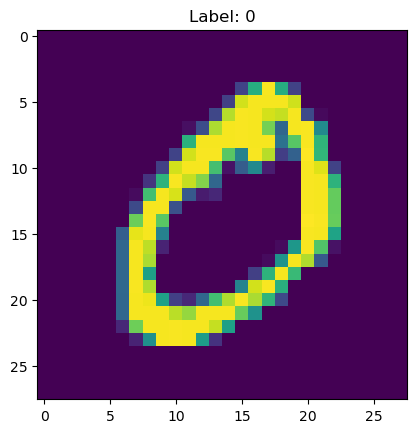

In [10]:
mnist_data = MNIST(
    os.path.join(yaml_config.config.cache_dir, "mnist"),
    download=True,
)

config = MnistDatasetArgs()
train = MnistDataset(mnist_data, config, yaml_config.config, "train")
val = MnistDataset(mnist_data, config, yaml_config.config, "val")
test = MnistDataset(mnist_data, config, yaml_config.config, "test")

sample = train[1]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

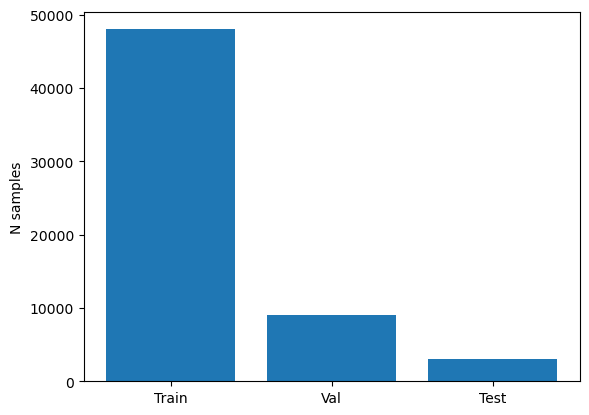

In [13]:
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")

mask min tensor(0.) mask max tensor(1.)
in torch.Size([3, 1024, 1024]) mask torch.Size([1024, 1024])
mean tensor(-0.9448) std tensor(1.0092)


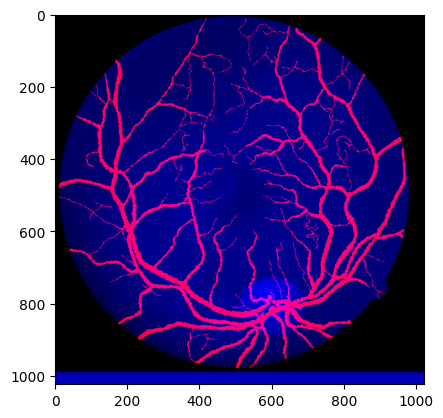

In [ ]:
from src.datasets.drive_dataset import DriveDataset, DriveDatasetArgs
from src.args.yaml_config import YamlConfig
import cv2
import torch
yaml_config = YamlConfig()
config = DriveDatasetArgs()
ds = DriveDataset(config, yaml_config.config)
sample = ds[1]

mask_opacity = 0.2  
inp = sample.input.mean(0)
unnorm_inp = (inp-inp.min())/(inp.max()-inp.min())
t = torch.stack([sample.target,torch.zeros_like(sample.target),unnorm_inp]).transpose(0,-1)
print("mask min", sample.target.min(), "mask max", sample.target.max())
print("in", sample.input.shape, "mask", sample.target.shape)

output_image = cv2.addWeighted(
            sample.input.mean(0).cpu().detach().numpy(), 1 - mask_opacity, sample.target.cpu().detach().numpy(), mask_opacity, 0
        )
#cv2.imwrite("test.png", output_image)

plt.imshow(t.numpy())

print("inp mean", inp.mean(), "std", inp.std())
print("inp min", unnorm_inp.min(), "inp max", unnorm_inp.max())
# plt.title(f"Label: {sample.target.argmax().item()}")
# plt.show()

In [5]:
from src.datasets.refuge_dataset import RefugeDataset, RefugeDatasetArgs
from src.args.yaml_config import YamlConfig

yaml_config = YamlConfig()
config = RefugeDatasetArgs(target="disc")
ds = RefugeDataset(config, yaml_config.config)
sample = ds[1]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

NameError: name 'plt' is not defined